<a href="https://colab.research.google.com/github/muhammad-naeem-tahir/Assignments/blob/main/PIAIC129482_Final_credit_card_fraud_detection_asignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from keras import models,layers
from keras import regularizers

In [3]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [1]:
from google.colab import files
uploaded = files.upload()


Saving creditcard.csv to creditcard.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [6]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.shape

(284807, 31)

In [11]:
non_fraud=df[df["Class"]==0]
fraud = df[df["Class"]==1]
non_fraud=non_fraud.sample(3*fraud.shape[0])
data = fraud.append(non_fraud, ignore_index=True)
# data["Class"].value_counts()
# x_data= data.drop(columns="Class", axis=0)
# label = data["Class"]

In [12]:
np.random.seed(11)
msk = np.random.rand(len(data)) <= 0.50
train_data = data[msk]
temp = data[~msk]
msk1 = np.random.rand(len(temp)) <= 0.60
test_data = temp[msk1]
val_data = temp[~msk1]


In [13]:
train_label = train_data.iloc[:,-1]
train_data = train_data.iloc[:,0:-1]
test_label = test_data.iloc[:,-1]
test_data = test_data.iloc[:,0:-1]
val_label = val_data.iloc[:,-1]
val_data = val_data.iloc[:,0:-1]

In [14]:
train_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00
5,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,5.664395,-9.854485,-0.306167,-10.691196,-0.638498,-2.041974,-1.129056,0.116453,-1.934666,0.488378,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00


In [15]:
train_mean = train_data.mean(axis=0) # taking the mean of 
train_data -= train_mean
train_std = train_data.std(axis=0)
train_data /= train_std
test_data -= train_mean
test_data /= train_std
val_data -= train_mean
val_data /= train_std

In [16]:
train_data.shape

(989, 30)

In [17]:
test_data.shape

(579, 30)

In [18]:
val_data.shape

(400, 30)

In [19]:
train_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02,9.890000e+02
mean,-1.526697e-17,3.520384e-16,-2.735706e-16,-2.141305e-16,-4.153514e-17,1.263103e-16,-4.713677e-16,-1.191609e-16,-2.950959e-17,5.483761e-16,5.757107e-16,-2.937769e-16,5.817165e-16,-1.121449e-16,-1.100120e-17,-2.245143e-17,-1.050727e-16,-2.433173e-16,9.659726e-17,-2.182419e-16,6.033821e-18,5.598824e-17,-9.828112e-17,-3.957064e-18,1.481794e-17,-2.814848e-17,-3.098297e-17,-9.561501e-17,-5.809307e-18,1.494142e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.925586e+00,-7.291072e+00,-4.690597e+00,-6.418443e+00,-1.965082e+00,-7.108944e+00,-3.824632e+00,-8.590227e+00,-1.024748e+01,-5.774552e+00,-6.480078e+00,-1.671664e+00,-4.733168e+00,-3.077439e+00,-4.647261e+00,-4.711520e+00,-4.722483e+00,-5.038881e+00,-4.887039e+00,-2.901097e+00,-1.190899e+01,-7.534901e+00,-8.715652e+00,-1.812996e+01,-3.612246e+00,-7.814848e+00,-2.831247e+00,-1.028865e+01,-9.430810e+00,-4.263301e-01
25%,-8.810956e-01,-9.790865e-02,-4.326018e-01,-8.617268e-02,-6.355025e-01,-1.223768e-01,-4.578011e-01,4.641380e-02,-7.565047e-02,-3.192317e-01,3.675924e-02,-6.584450e-01,-1.517037e-01,-6.833652e-01,3.937308e-02,-5.843395e-01,-5.621347e-02,1.601141e-01,-1.691552e-01,-5.600380e-01,-2.916423e-01,-2.034590e-01,-5.074149e-01,-1.735131e-01,-6.249001e-01,-5.775143e-01,-6.680834e-01,-1.934579e-01,-2.240420e-01,-4.118336e-01
50%,-1.598422e-01,1.602741e-01,-1.721592e-01,2.807421e-01,-2.818260e-01,1.504606e-01,-3.248830e-02,2.788723e-01,1.463528e-03,1.573921e-01,3.090113e-01,-2.330907e-01,3.836362e-01,3.431649e-02,4.047452e-01,4.824740e-02,3.057661e-01,3.037646e-01,2.310778e-01,-9.002974e-02,-8.847637e-02,-9.592375e-02,5.744769e-02,-4.972849e-03,9.157051e-02,2.266151e-02,-1.493712e-01,-6.269551e-02,-3.734650e-02,-3.267877e-01
75%,9.701464e-01,5.616283e-01,1.562496e-01,5.337254e-01,2.887345e-01,4.040371e-01,3.840361e-01,4.256311e-01,1.293260e-01,5.730704e-01,4.573322e-01,2.353695e-01,5.586151e-01,6.608331e-01,5.431742e-01,6.930691e-01,5.359256e-01,4.360840e-01,5.250911e-01,4.635472e-01,2.249327e-01,3.125672e-02,5.593584e-01,1.840214e-01,7.304055e-01,5.656885e-01,5.492981e-01,2.598747e-01,2.919984e-01,-3.869470e-02
max,1.631419e+00,8.399193e-01,6.459982e+00,9.841812e-01,4.089730e+00,3.886164e+00,3.827445e+00,2.050214e+00,5.453653e+00,4.051278e+00,3.919526e+00,4.837617e+00,9.579950e-01,3.152704e+00,1.370809e+00,2.840636e+00,1.342945e+00,1.885748e+00,2.202253e+00,3.662447e+00,9.035518e+00,1.179693e+01,5.696424e+00,5.026883e+00,2.196928e+00,3.568515e+00,5.469138e+00,4.191413e+00,1.263751e+01,1.028172e+01


In [20]:
model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.compile(loss= 'binary_crossentropy', optimizer= 'rmsprop', metrics=['accuracy'])

In [22]:
history=model.fit(train_data, train_label, epochs=100,validation_data=(val_data,val_label))

Epoch 1/100
31/31 [==============================] - 3s 10ms/step - loss: 0.7774 - accuracy: 0.5392 - val_loss: 0.6330 - val_accuracy: 0.7450
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.7151 - accuracy: 0.6698 - val_loss: 0.6102 - val_accuracy: 0.8700
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6656 - accuracy: 0.7258 - val_loss: 0.5913 - val_accuracy: 0.9050
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6295 - accuracy: 0.7735 - val_loss: 0.5646 - val_accuracy: 0.9025
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6094 - accuracy: 0.7844 - val_loss: 0.5338 - val_accuracy: 0.9075
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5801 - accuracy: 0.7979 - val_loss: 0.5052 - val_accuracy: 0.9075
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5616 - accuracy: 0.8101 - val_loss: 0.4767 - val_accuracy: 0.9125
Epoch 8/100


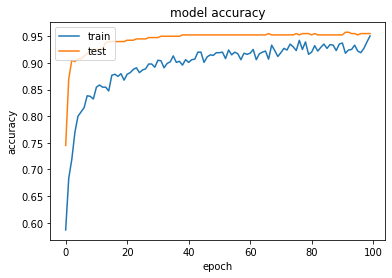

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

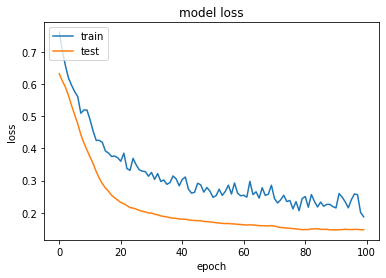

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
loss, accuracy = model.evaluate(test_data, test_label)

19/19 [==============================] - 0s 2ms/step - loss: 0.1063 - accuracy: 0.9724


In [26]:
predictions = model.predict(test_data)

In [27]:
y_pred = (predictions > 0.5)

In [28]:
con = tf.math.confusion_matrix(
    test_label, y_pred, num_classes=2, weights=None, dtype=tf.dtypes.int32,
    name=None
)

In [29]:
con

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[434,   1],
       [ 15, 129]], dtype=int32)>

In [30]:
from sklearn.metrics import classification_report
print(classification_report(test_label,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       435
           1       0.99      0.90      0.94       144

    accuracy                           0.97       579
   macro avg       0.98      0.95      0.96       579
weighted avg       0.97      0.97      0.97       579

